### Library

In [1]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import shutil

C:\Python311\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Define function

In [2]:
def apply_median_blur(image, kernel_size): #5
    return cv2.medianBlur(image, kernel_size)

def increase_brightness(image, value): #30
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = np.where(v <= 255 - value, v + value, 255)
    final_hsv = cv2.merge((h, s, v))
    return cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

def decrease_brightness(image, value): #30
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = np.where(v >= value, v - value, 0)
    final_hsv = cv2.merge((h, s, v))
    return cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

def salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    total_pixels = image.size
    
    num_salt = int(total_pixels * salt_prob)
    salt_coordinates = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_image[salt_coordinates[0], salt_coordinates[1]] = 255
    
    num_pepper = int(total_pixels * pepper_prob)
    pepper_coordinates = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy_image[pepper_coordinates[0], pepper_coordinates[1]] = 0
    
    return noisy_image

def get_box(image, label_dir):
    boxes = []
    cropped_images =[]
    with open(label_dir, 'r') as f:
        file = f.readlines()
        for i in range(0, len(file)):
            parts = file[i].split()
            x_center = float(parts[1])
            y_center = float(parts[2])
            width = float(parts[3])
            height = float(parts[4])
            #get box
            box = (x_center, y_center, width, height)
            #get coordinates
            left = int((box[0] - box[2] / 2) * image.shape[1])
            right = int((box[0] + box[2] / 2) * image.shape[1])
            top = int((box[1] - box[3] / 2) * image.shape[0])
            bottom = int((box[1] + box[3] / 2) * image.shape[0])
            #append box and cropped_image
            boxes.append([left, right, top, bottom])
            cropped_images.append(image[top:bottom, left:right])
    return (boxes, cropped_images)

In [3]:
def processing_image(image, val):
    increase = []
    decrease = []
    noise = []
    for i in range(1, val):
        increase.append(increase_brightness(image, i * 5));
        decrease.append(decrease_brightness(image, i * 8));
        noise.append(salt_and_pepper_noise(image, 0.001*i*1.12, 0.001*i*1.12))
    #for i in range(1, val):
    #    images.append(apply_median_blur(image,i + 2))
    return [increase, decrease, noise]

In [4]:
def apply_filter(image, filter_box, box):
    top, left = (box[2], box[0]) 
    bottom, right = (box[3], box[1]) 
    image[top:bottom, left:right] = filter_box
    return image

In [5]:
def show_images(images):
    num_rows = 20
    num_cols = 10
    #create grid of figure
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i])
        plt.axis('on')  # Tắt trục để hiển thị hình ảnh sạch sẽ
    plt.show()

### Directory

In [5]:
img_dir = r"Z:\train_label_new\run_1\images\train\131.jpg"

In [6]:
label_dir = r"Z:\train_label_New\run_1\labels\train\131.txt"

# Test On One

In [438]:
image = cv2.imread(img_dir)

In [439]:
boxes, image_cropped = get_box(image, label_dir)

In [434]:
image = apply_filter(image, increase_brightness(image_cropped[0], 100), boxes[0])

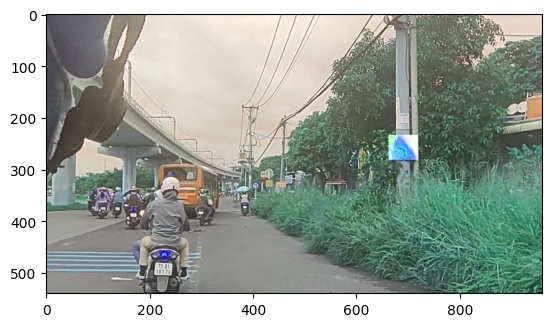

In [416]:
plt.imshow(image)

In [132]:
images = processing_image(image, 15)

# Fill all images

In [7]:
input_dir = r"Z:/train_label_new/run_6"
images_dir = os.path.join(input_dir,'images')
labels_dir = os.path.join(input_dir,'labels')
os.makedirs(images_dir, exist_ok=True)
os.makedirs(labels_dir, exist_ok=True)
os.makedirs(os.path.join(input_dir,'labels'), exist_ok=True)
list_items = os.listdir(images_dir)

In [8]:
list_items

['001.jpg',
 '002.jpg',
 '003.jpg',
 '004.jpg',
 '005.jpg',
 '006.jpg',
 '007.jpg',
 '008.jpg',
 '009.jpg',
 '010.jpg',
 '011.jpg',
 '012.jpg',
 '013.jpg',
 '014.jpg',
 '015.jpg',
 '016.jpg',
 '017.jpg',
 '018.jpg',
 '019.jpg',
 '020.jpg',
 '021.jpg',
 '022.jpg',
 '023.jpg',
 '024.jpg',
 '025.jpg',
 '026.jpg',
 '027.jpg',
 '028.jpg',
 '029.jpg',
 '030.jpg',
 '031.jpg',
 '032.jpg',
 '033.jpg',
 '034.jpg',
 '035.jpg',
 '036.jpg',
 '037.jpg',
 '038.jpg',
 '039.jpg',
 '040.jpg',
 '041.jpg',
 '042.jpg',
 '043.jpg',
 '044.jpg',
 '045.jpg',
 '046.jpg',
 '047.jpg',
 '048.jpg',
 '049.jpg',
 '050.jpg',
 '051.jpg',
 '052.jpg',
 '053.jpg',
 '054.jpg',
 '055.jpg',
 '056.jpg',
 '057.jpg',
 '058.jpg',
 '059.jpg',
 '060.jpg',
 '061.jpg',
 '062.jpg',
 '063.jpg',
 '064.jpg',
 '065.jpg',
 '066.jpg',
 '067.jpg',
 '068.jpg',
 '069.jpg',
 '070.jpg',
 '071.jpg',
 '072.jpg',
 '073.jpg',
 '074.jpg',
 '075.jpg',
 '076.jpg',
 '077.jpg',
 '078.jpg',
 '079.jpg',
 '080.jpg',
 '081.jpg',
 '082.jpg',
 '083.jpg',
 '08

In [9]:
output_path = r"Z:/train_label_new/run_6"
output_images_path = os.path.join(output_path,'images')
output_labels_path = os.path.join(output_path,'labels')
os.makedirs(output_path, exist_ok=True)
os.makedirs(output_images_path, exist_ok=True)
os.makedirs(output_labels_path, exist_ok=True)

In [10]:
for item in list_items: 
    #file processing
    name_file = item.replace('.jpg', '')
    image_path = os.path.join(images_dir, item)
    image_root = cv2.imread(image_path)
    label_name = item.replace('jpg', 'txt')
    label_path = os.path.join(labels_dir, label_name)
    boxes, cropped_images = get_box(image_root, label_path)

    size_boxes = len(boxes)

    filtered_object = {}
    for i in range(1, size_boxes + 1):
        filtered_object[str(i)] = []

    val = 10

    for index_object, cropped_image in enumerate(cropped_images):
        filter_images = processing_image(cropped_image, val)
        filtered_object[str(index_object + 1)].append(filter_images)

    #show_images(filtered_object['1'][0][0])
    keys = list(filtered_object.keys())

    cnt = 0

    for filter_ in range(0, 3):
        for ind in range(0, val - 1):
            final_image = image_root.copy()  # Tạo một bản sao của hình ảnh gốc:
            cnt += 1
            for key in keys:
                final_image = apply_filter(final_image, filtered_object[key][0][filter_][ind], boxes[int(key) - 1])
            output_file = os.path.join(output_images_path, f"{name_file}_{cnt}.jpg")
            cv2.imwrite(output_file, final_image)

### create new labels

In [11]:
list_name = os.listdir(output_images_path)

In [12]:
for file in list_name:
    if '_' in file:  # Kiểm tra xem tệp có chứa '_' không
        paths = file.split('_')
        item = "_".join(paths[:1])
        old_file = os.path.join(labels_dir, item + '.txt')
        tail_name = "_" + (paths[1].replace('.jpg', '.txt'))
        new_file = os.path.join(output_labels_path, item + tail_name)
        shutil.copy(old_file, new_file)